In [1]:
%matplotlib inline

W0722 16:28:22.231189 4417369536 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0722 16:28:22.885305 4417369536 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_hwalsuklee_refactoring/model/softmax_regression.py:95: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W0722 16:28:22.885987 4417369536 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_hwalsuklee_refactoring/model/softmax_regression.py:106: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 16:28:22.889402 4417369536 deprecation_wrapper

grandient_step :  1000
loss :            0.07093757

grandient_step :  2000
loss :            0.060665473

grandient_step :  3000
loss :            0.010527104

grandient_step :  4000
loss :            0.018789936

grandient_step :  5000
loss :            0.00065203215

grandient_step :  6000
loss :            0.0114890095

grandient_step :  7000
loss :            0.0035955203

grandient_step :  8000
loss :            0.0015759564



W0722 16:28:40.094572 4417369536 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_hwalsuklee_refactoring/model/softmax_regression.py:220: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



grandient_step :  9000
loss :            0.058809806



W0722 16:28:40.807634 4417369536 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_hwalsuklee_refactoring/model/softmax_regression.py:206: The name tf.train.import_meta_graph is deprecated. Please use tf.compat.v1.train.import_meta_graph instead.

W0722 16:28:40.868739 4417369536 deprecation.py:323] From /Users/sungchul/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


train accuracy :  0.9968666666666667
test accuracy :  0.9804
train accuracy :  0.9968666666666667
test accuracy :  0.9804
[[ 967    1    0    0    1    3    2    1    3    2]
 [   0 1119    1    1    0    1    1    1   11    0]
 [   1    1  992    5    4    0    4    8   16    1]
 [   0    0    0  997    0    0    0    2    7    4]
 [   1    0    0    1  964    0    6    2    0    8]
 [   2    0    0   14    1  866    2    0    6    1]
 [   1    2    0    1    3    9  939    0    3    0]
 [   1    1    5    0    0    0    0 1009    2   10]
 [   0    0    0    2    3    0    0    2  964    3]
 [   0    2    0    6    7    1    0    1    5  987]]


<Figure size 432x288 with 0 Axes>

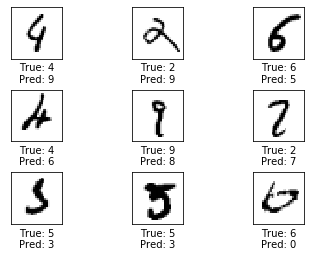

In [2]:
import numpy as np
import tensorflow as tf
from model.softmax_regression import SoftmaxRegression
from data_loading import mnist_flat_loader as mnist_flat
    
x_train, y_train, y_train_cls, x_test, y_test, y_test_cls, cls_names = mnist_flat.data_loading()
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-3, epoch=15, batch_size=100, report_period=1000, np_seed=1, tf_seed=1,
                 drop_out_rate=0.3,
                 initializer=tf.contrib.layers.xavier_initializer(),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img',
                 activation=tf.nn.relu)
    a.train()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-3, epoch=15, batch_size=100, report_period=1000, np_seed=1, tf_seed=1,
                 drop_out_rate=0.3,
                 initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img',
                 activation=tf.nn.relu)
    a.restore()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
    a.compute_confusion_matrix(x_test, y_test, y_test_cls)
    a.plot_9_images_with_false_prediction(x_test, y_test, y_test_cls)